# Module 4 Autograded Assignment

In [1]:
# Run this cell to load necesary libraries for autograder
library(testthat)
library(ggplot2)

# Problem 1

<img src="ralphie-run.jpg" style="width:600px;"/>

Ralphie is fascinated with sports and sports fans, and wants to how many people go to the football games to see her run across the field. However, she can't ask the game organizers to share their numbers with her (because she's a buffalo) so she decides to count how many people are in the stadium herself. But counting while running is difficult, so her counts may be incorrect. To address this problem, Ralphie has hired $9$ other buffalo to hide amongst the stadium and count the number of attendees. Each buffalo counted at a total of $n=20$ games, and their results can be seen below. Note that this problem assumes that all of the games have the same underlying population distribution.

We want to help Ralphie find a confidence interval for the average number of attendees. Let's begin by loading in all data recorded by the herd. The data is in a file called buffalo.csv which is a table of comma separated values. We will also use the "head" function to show the first few rows of the table.

(Note: We will be using a function called "read.table()". R also has a function called "read.csv()" which might seem more appropriate here since we are reading a csv file. read.csv() is just a special case of read.table() but it requires a little more care to use in terms of setting up labels for rows and columns.)

In [2]:
# Run this cell
data.buffalo = read.table("buffalo.csv",sep=",")

# Check out the dimension of the data
dim(data.buffalo)

# Show the first few rows of the data
head(data.buffalo)

[1] 20 10

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,32577,23042,32978,32634,27487,15760,19428,23231,24965,39427
2,29581,20205,18114,23263,23204,22530,26513,19648,27614,17574
3,23654,27264,25800,29825,24657,28021,31514,20854,17292,25280
4,23585,21742,22400,21103,29360,31911,30952,22422,32429,23323
5,35547,28364,22283,20007,18000,18606,15617,31939,29992,23636
6,26596,22739,39648,20227,24670,26500,28709,23964,11656,17418


**Part A:** The data in the first column of data.buffalo, labeled as column "V1", are measurements taken by a buffalo named Sally. In the next cell, extract Sally's data by typing 

<code>data.sally = data.buffalo$V1</code>

Alternatively, you may type

<code>data.sally = data.buffalo[,1]</code>

to get that first column.

Assuming that these data come from a normal distribution, compute a 90\% confidence interval for the true average number of attendees. You will use functions like mean(), var(), and qnorm(). Store your lower and upper confidence interval endpoints in the variables lower.bound and upper.bound. Report your answers in the next cell by replacing the "NA placeholders" with your values.

In [3]:
# Placeholders for answers
lower.bound = NA
upper.bound = NA

# Do your computations here and then redefine lower.bound and upper.bound for the autograder 

#extract sallys data
data.sally = data.buffalo$V1

#sample
n = length(data.sally)

#sample mean and sample variance
xbar = mean(data.sally)
s = sqrt(var(data.sally))

#critical value for 90% CI with df = n - 1
cv = qt(0.95, df = n - 1)

# Compute lower and upper bounds of the confidence interval
lower.bound = xbar - cv * s / sqrt(n)
upper.bound = xbar + cv * s / sqrt(n)

lower.bound
upper.bound



[1] 26341.21

[1] 29992.79

In [ ]:
# Hidden Test Cell

**Part B:** For these 4 questions, determine whether the answer is true or false. Report your answers in the next cell by replacing the "NA placeholders" for each part with either TRUE or FALSE.

Ralph (Ralphie's cousin) computed a 90% confidence interval as $[19,571, 25,249]$ for the mean number of attendees. But he's not sure how to interpret his confidence interval so he's asked you for help. For each of the following statements, answer `TRUE` or `FALSE` into the corresponding answer variable for whether the statement is correct.

**1.** If Ralph has no other evidence regarding the true mean number of attendees, he could say there is a $90\%$ chance that the population's true mean falls between $19,571$ and $25,249$.

**2.** If Ralph counts the number of attendees at another game, there is a $90\%$ chance that the counted number will be between $19,571$ and $25,249$. 

**3.** If Ralph also calculates a $95\%$ confidence interval for his data, then the $95\%$ interval will be wider than the $90\%$ interval.

**4.** If Ralph counts the number of attendees at an $11^{th}$ game, adds that count to his original data and then calculates another $90\%$ confidence interval, then the new interval will be narrower than the original one (i.e. the difference between the upper and lower values will be smaller).

In [17]:
# Replace each NA with either TRUE or FALSE 
# Please ignore the prompt that says "Your code here". This is not a coding problem!
prob.1.a.1 = FALSE

prob.1.a.2 = FALSE

prob.1.a.3 = TRUE

prob.1.a.4 = TRUE




In [ ]:
# Hidden Test Cell

**Part C:**

Now let's look at the data from all of the buffalo. If we calculate 10 different $60\%$ confidence interval for each buffalo's count (i.e. each using $20$ values), how many CIs do we expect to contain the true mean? Store your answer in `theoretical_hits`.

We will now check what we actually observe against the theoretical answer. Calculate the $60\%$ confidence interval for each buffalo's count. 

Assuming that the true mean is $\mu=25000$, find the number of those CIs contain the true mean. Store this value in `sample_hits`. Does this value match the theoretical value? Should it?

<i>(Here are some hints if you have no idea where to start. Your correct approach may not look anything like this!
    <ol>
        <li> Create a 10 by 1 vector to hold the results for each confidence interval. It could be a Boolean vector holding values like TRUE and FALSE or a numeric vector holding values like 1 and 0 where 1 means that the true mean is in the confidence interval and 0 means that it isn't.</li>
        <li>Create a "for loop" that will run 10 times. Each time through the loop you can compute a new confidence interval using your previous code for Sally's confidence interval with minor adjustments, determine whether or not the true $\mu$ is in the interval, and fill in the corresponding position in the results vector with your conclusion.</li>
        </ol>)</i>

In [22]:
# Placeholders for answers
data.buffalo = read.table("buffalo.csv", sep = ",")

theoretical_hits = NA
sample_hits = NA

CI_level = 0.6  
true_mean = 25000
n = 20   # number of games per buffalo

# Expected number of hits
theoretical_hits = CI_level * 10

# Track actual hits and intervals
sample_hits = 0  
CIs = matrix(NA, nrow = 10, ncol = 2)
contains_true_mean = rep(FALSE, 10)

# Compute 60% confidence intervals using t-distribution
for (i in 1:10) {
  buffalo_data = data.buffalo[, i]
  xbar = mean(buffalo_data)
  s = sd(buffalo_data)
  cv = qt(0.8, df = n - 1)  # two-tailed 60% CI → middle 60% → qt(0.8)
  margin_error = cv * s / sqrt(n)
  
  lower = xbar - margin_error
  upper = xbar + margin_error
  
  CIs[i, ] = c(lower, upper)
  contains_true_mean[i] = (true_mean >= lower & true_mean <= upper)
}

# Final output
sample_hits = sum(contains_true_mean)

theoretical_hits 
sample_hits 



[1] 6

[1] 6

In [8]:
# Hidden Test Cell

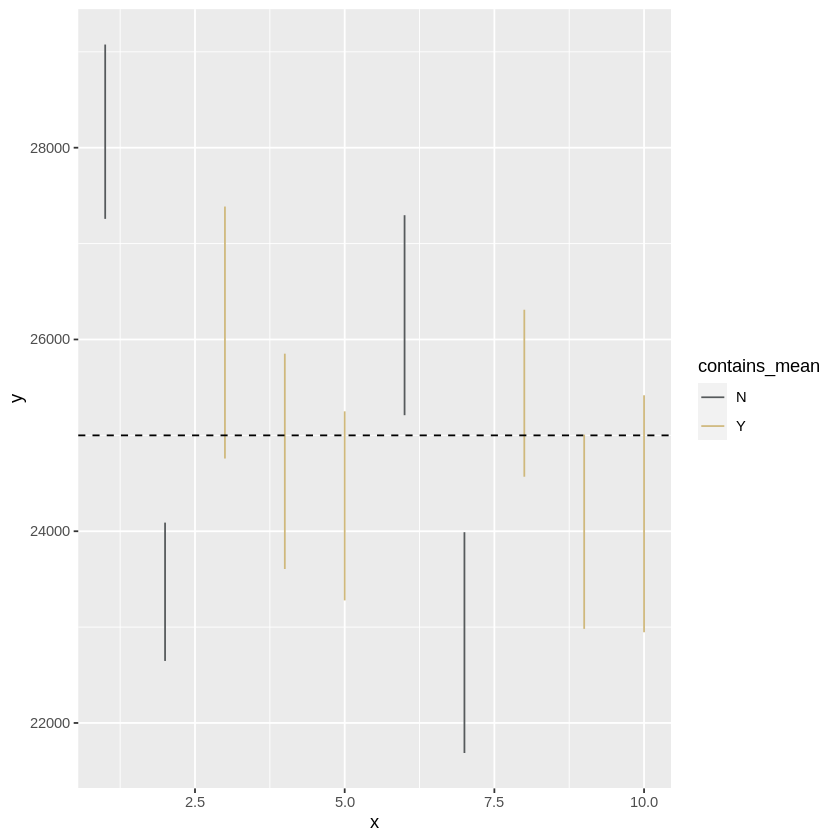

In [21]:
# Run this cell for a cool visualization of the confidence intervals.
# Don't worry about understanding the code!
# This cell is not being graded.

CIs_to_plot = 10
g = ggplot()

segment_data = data.frame(
    x = seq(1, CIs_to_plot),
    xend = seq(1, CIs_to_plot), 
    y = CIs[1:10, 1],
    yend = CIs[1:10, 2],
    contains_mean = ifelse(contains_true_mean[1:10], "Y", "N")
)
group.colors = c(Y="#CFB87C", N="#565A5C")

g + geom_segment(data=segment_data, aes(x=x, y=y, xend=xend, yend=yend, color=contains_mean)) + 
    scale_color_manual(values=group.colors) +
    geom_hline(yintercept=true_mean, linetype="dashed", color="black")

# Problem 2

Suppose you run two different email Ad campaigns over many days and record the amount of traffic driven to your website on days that each Ad is sent. In particular, suppose that Ad 1 is sent on 60 different days and generates an average of 2.2 million page views per day with an sd of 1 million views, and Ad 2 is sent on 40 different days and generates an average of 2.5 million page views per day with an sd of 0.75 million views.

**Part A)** 

Find an approximate 95% confidence interval for $\mu_{1}-\mu_{2}$, the difference in average page views per day (in units of millions of views). Save the upper bound as `conf.int.upper` and the lower bound as `conf.int.lower`. Round your answers to have three decimal places using the command

<code>round(your_answer_here,3)</code>

In [14]:
# Placeholders for answers
conf.int.lower = NA
conf.int.upper = NA

#given vals
x1 = 2.2  # Mean of Ad 1
s1 = 1    # SD of Ad 1
n1 = 60   # Sample size of Ad 1

x2 = 2.5   # Mean of Ad 2
s2 = 0.75  # SD of Ad 2
n2 = 40    # Sample size of Ad 2

#difference in sample means
mean_diff = x1 - x2

# Standard error of the difference
SE = sqrt((s1^2 / n1) + (s2^2 / n2))

#Critical z-value for 95% confidence
z = qnorm(0.975)

#confidence interval
conf.int.lower = round(mean_diff - z * SE, 3)
conf.int.upper = round(mean_diff + z * SE, 3)

conf.int.lower
conf.int.upper



[1] -0.644

[1] 0.044

In [ ]:
# Hidden Test Cell

**Part B)**

Based on your results to **Part A**, is there a statistically significant difference between Ad 1 and Ad 2 at this 95\% confdence level? Save the boolean value `TRUE` (if there is a difference) or `FALSE` (if there is not a difference) into variable `prob.2.b`.

In [16]:
# Replace the NA with either TRUE or FALSE 
# Please ignore the prompt that says "Your code here". This is not a coding problem!
prob.2.b = NA

prob.2.b = conf.int.lower > 0 | conf.int.upper < 0
prob.2.b

[1] FALSE

In [ ]:
# Hidden Test Cell